In [1]:
import numpy as np
import imutils
import cv2
import matplotlib.pyplot as plt

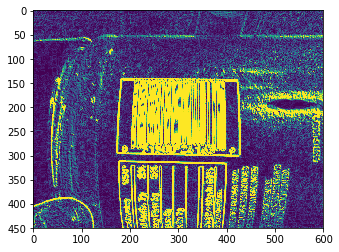

In [2]:
image = cv2.imread("01.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# compute the Scharr gradient magnitude representation of the images
# in both the x and y direction using OpenCV 2.4
ddepth = cv2.cv.CV_32F if imutils.is_cv2() else cv2.CV_32F
gradX = cv2.Sobel(gray, ddepth=ddepth, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(gray, ddepth=ddepth, dx=0, dy=1, ksize=-1)

# subtract the y-gradient from the x-gradient
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)
plt.imshow(gradient)

In [4]:
# TO FILTER OUT NOISE

# blur and threshold the image
blurred = cv2.blur(gradient, (9, 9)) #9X9 filter is used to perform the bluring
(_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)
# Any pixel in the gradient image that is not greater than 225 is set to 0 (black).
# Otherwise, the pixel is set to 255 (white).

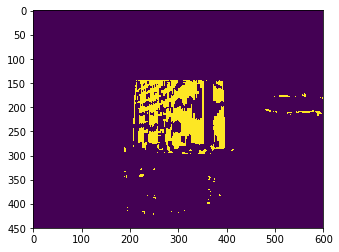

In [5]:
plt.imshow(thresh)

In [6]:
# construct a closing kernel and apply it to the thresholded image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
# This is done to close the gap in between barcode for making it easier to detector

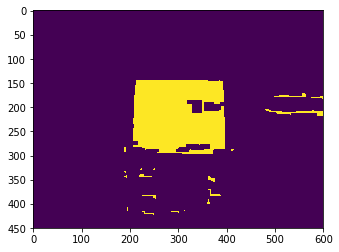

In [7]:
plt.imshow(closed)

In [8]:
# perform a series of erosions and dilations
closed = cv2.erode(closed, None, iterations = 4)
closed = cv2.dilate(closed, None, iterations = 4)
# Removing Small blobs from the image which can interfere

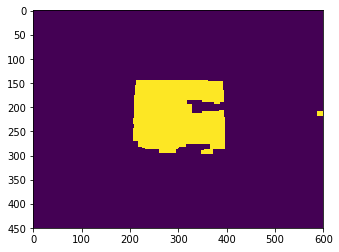

In [9]:
plt.imshow(closed)

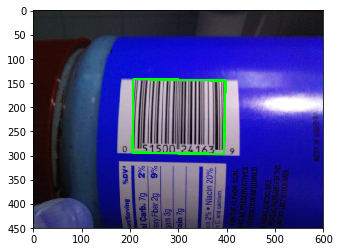

In [10]:
# Finding contonour of the barcode finally
# find the contours in the thresholded image, then sort the contours
# by their area, keeping only the largest one
cnts = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
 
# compute the rotated bounding box of the largest contour
rect = cv2.minAreaRect(c)
box = cv2.cv.BoxPoints(rect) if imutils.is_cv2() else cv2.boxPoints(rect)
box = np.int0(box)
 
# draw a bounding box arounded the detected barcode and display the
# image
cv2.drawContours(image, [box], -1, (0, 255, 0), 3)
plt.imshow(image)
# cv2.imshow("Image", image)
# cv2.waitKey(0)

In [11]:
# Now to run that on video

# import the necessary packages
import numpy as np
import cv2
import imutils
 
def detect(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # compute the Scharr gradient magnitude representation of the images
    # in both the x and y direction using OpenCV 2.4
    ddepth = cv2.cv.CV_32F if imutils.is_cv2() else cv2.CV_32F
    gradX = cv2.Sobel(gray, ddepth=ddepth, dx=1, dy=0, ksize=-1)
    gradY = cv2.Sobel(gray, ddepth=ddepth, dx=0, dy=1, ksize=-1)

    # subtract the y-gradient from the x-gradient
    gradient = cv2.subtract(gradX, gradY)
    gradient = cv2.convertScaleAbs(gradient)

    # blur and threshold the image
    blurred = cv2.blur(gradient, (9, 9))
    (_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)

    # construct a closing kernel and apply it to the thresholded image
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # perform a series of erosions and dilations
    closed = cv2.erode(closed, None, iterations=4)
    closed = cv2.dilate(closed, None, iterations=4)

    # find the contours in the thresholded image
    cnts = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    # if no contours were found, return None
    if len(cnts) == 0:
        return None

    # otherwise, sort the contours by area and compute the rotated
    # bounding box of the largest contour
    c = sorted(cnts, key=cv2.contourArea, reverse=True)[0]
    rect = cv2.minAreaRect(c)
    box = cv2.cv.BoxPoints(rect) if imutils.is_cv2() else cv2.boxPoints(rect)
    box = np.int0(box)

    # return the bounding box of the barcode
    return box

In [14]:
from imutils.video import VideoStream
import time
vs = VideoStream(src=0).start()
time.sleep(2.0)

In [ ]:
while True:
    # grab the current frame and then handle if the frame is returned
    # from either the 'VideoCapture' or 'VideoStream' object,
    # respectively
    frame = vs.read()
#     frame = frame[1] 

    # check to see if we have reached the end of the
    # video
    if frame is None:
        break

    # detect the barcode in the image
    box = detect(frame)

    # if a barcode was found, draw a bounding box on the frame
    if box is not None:
        cv2.drawContours(frame, [box], -1, (0, 255, 0), 2)

    # show the frame and record if the user presses a key
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF

    # if the 'q' key is pressed, stop the loop
    if key == ord("q"):
        break

# if we are not using a video file, stop the video file stream
if not args.get("video", False):
    vs.stop()

# otherwise, release the camera pointer
else:
    vs.release()

# close all windows


In [ ]:
cv2.destroyAllWindows()